In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU 
from keras.datasets import mnist
from keras.optimizers import Adam 
from keras.regularizers import l1
import random

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train = (X_train.astype('float32') )/255.0
X_test = (X_test.astype('float32') )/255.0

In [ ]:
print(np.max(X_train))
print(np.min(X_train))

1.0
0.0


In [ ]:
adam = Adam(lr = 2e-4, beta_1 = 0.5)

In [ ]:
encoder = Sequential()
encoder.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = "same", input_shape = (28,28,1)))
encoder.add(LeakyReLU(0.2))
encoder.add(Conv2D(128, kernel_size = (5,5), strides = (2,2), padding = "same"))
encoder.add(LeakyReLU(0.2))
encoder.add(Flatten())
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(64))
encoder.add(LeakyReLU(0.2))
encoder.compile(loss="binary_crossentropy", optimizer = adam)
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)              

In [ ]:
decoder = Sequential()
decoder.add(Dense(7*7*128, input_shape = (64,)))
decoder.add(Reshape((7,7,128)))
decoder.add(LeakyReLU(0.2))
decoder.add(Conv2DTranspose(64, strides = (2,2), padding = "same", kernel_size=(5,5)))
decoder.add(LeakyReLU(0.2))
decoder.add(Conv2DTranspose(1, strides = (2,2), padding = "same", kernel_size=(5,5), activation="sigmoid"))
decoder.compile(loss="binary_crossentropy", optimizer = adam)
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 6272)              407680    
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 28, 28, 1)         1601      
Total params: 614,145
Trainable params: 614,145
Non-trainable params: 0
_______________________________________________

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
auto_input = Input(shape = (28,28,1))
auto_code = encoder(auto_input)
auto_output = decoder(auto_code)

model = Model(auto_input, auto_output)
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [ ]:
noise_train = np.random.normal(0,1,(X_train.shape))
noise_factor = 0.1
noisy_X_train = X_train + noise_factor*noise_train
noise_test = np.random.normal(0,1,(X_test.shape))
noisy_X_test = X_test + noise_factor*noise_test

In [ ]:
print(noisy_X_train.shape)
print(noisy_X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


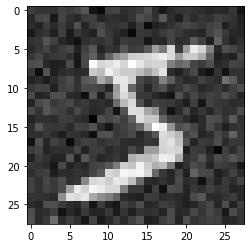

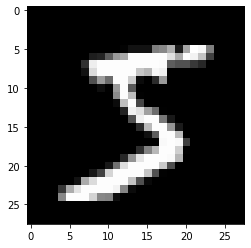

In [ ]:
img = noisy_X_train[0]
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.show()

img = X_train[0]
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
model.fit(noisy_X_train, X_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1953
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0853
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0780
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0748
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0731
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0718
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0710
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0703
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0699
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0694


In [ ]:
def plot_imgs(X_test, samples = 10):
  test_imgs = random.sample(list(X_test), samples)
  test_imgs = np.array(test_imgs)
  test_imgs = test_imgs.reshape(samples, 28, 28)

  print("Actual Images")
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(test_imgs[i], cmap='gray')
     plt.axis('off')
  plt.tight_layout()
  plt.show()

  print("Predicted")
  pred = model.predict(test_imgs)
  pred_imgs = pred.reshape(samples,28,28)
  # print()
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(pred_imgs[i], cmap='gray')
     plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
print(X_test.shape)

(10000, 28, 28, 1)


Actual Images


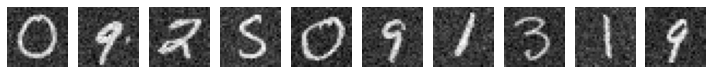

Predicted


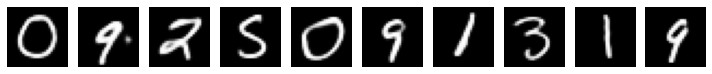

In [ ]:
plot_imgs(noisy_X_test)